In [1]:
import numpy as np
import scipy as sp
from numpy.random import rand
import matplotlib.pyplot as plt

In [2]:
# 1D Nearest neighbor connectivity
connectivity = [-1, 1]

def out_of_bounds(site,N):
    return site < 0 or site > N-1
        
def neighbors(idx,N):
    hold = []
    for i, bond in enumerate(connectivity):
        site=idx+bond
        if not out_of_bounds(site,N):
            hold.append(site)
    return hold

In [3]:
def generate_cluster(p, R, lbl=1,lattice=None):
    if lattice is not None:
        N = len(lattice)
        
    else:
        N = 2*R+1
        lattice = np.zeros((N,),dtype=np.int32)
        lattice[R] = lbl
        perimeter = [R]

    while True:
        next_perimeter=[]
        for idx in perimeter:
            for site in neighbors(idx,N):
                if abs(lattice[site]) != lbl:
                    val = (p<rand())*(lbl+1)-1
                    lattice[site] = val
                    if val == lbl:
                        next_perimeter.append(site)
        if len(next_perimeter)==0:
            break
        perimeter = next_perimeter
    return lattice


def generate_dense_cluster(p,R,lbl=1,lattice=None):
    if lattice is not None:
        starts = np.where(lattice < 0)[0]
        if not starts.size:
            return lattice
        N=len(lattice)
        lattice[starts[0]]=lbl
        perimeter = [starts[0]]
        
    else:
        N = 2*R+1
        lattice = np.zeros((N,),dtype=np.int32)
        lattice[R] = lbl
        perimeter = [R]
        
        
    while True:
        next_perimeter=[]
        for idx in perimeter:
            for site in neighbors(idx,N):
                if lattice[site] <=0 and lattice[site] != -1*lbl:
                    val = lbl*(2*(p<rand())-1)
                    lattice[site] = val
                    if val == lbl:
                        next_perimeter.append(site)
        if len(next_perimeter)==0:
            break
        perimeter = next_perimeter
    return lattice

def generate_network(p,R,max_iter=50):
    lbl=1
    lattice=generate_dense_cluster(p,R)
    while lbl in lattice:
        lbl+=1
        lattice = generate_dense_cluster(p,R,lbl,lattice)
        if lbl >= max_iter:
            break
    return lattice
        

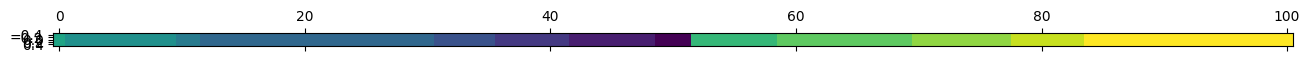

In [4]:
p=.1
R=50

lattice=generate_network(p,R)

plt.matshow([lattice])

In [5]:
lattice

array([ 8,  7,  7,  7,  7,  7,  7,  7,  7,  7,  6,  6,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  4,  4,  4,
        4,  4,  3,  3,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  1,  1,
        1,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13],
      dtype=int32)

In [14]:
f"test={12}"

'test=12'

In [6]:
pvals = np.arange(.01,1,.05)
trials=1000
R=50
avg_cluster_size = np.zeros(len(pvals))
errs = np.zeros(len(pvals))
for idx, p in enumerate(pvals):
    data=[np.count_nonzero(generate_cluster(p,R)>0) for _ in range(trials)]
    avg_cluster_size[idx] = np.mean(data)
    errs[idx] = np.std(data)

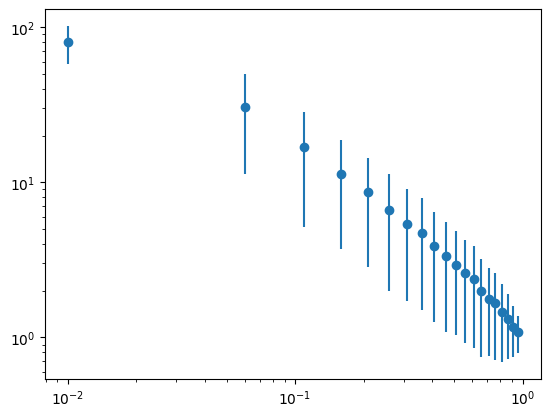

In [ ]:
ax=plt.axes()
ax.scatter(pvals, avg_cluster_size, yerr=errs,linestyle='',marker='o')
ax.set_xscale("log")
ax.set_yscale("log")
plt.xlabel("Bond ")
plt.show()

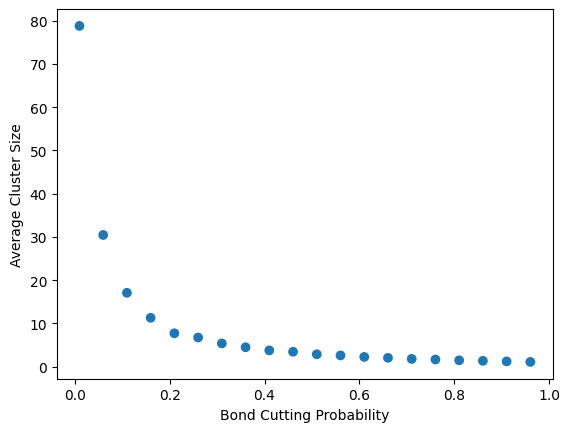

In [8]:
plt.scatter(pvals, avg_cluster_size, linestyle='',marker='o')
plt.xlabel("Bond Cutting Probability")
plt.ylabel("Average Cluster Size")
plt.show()

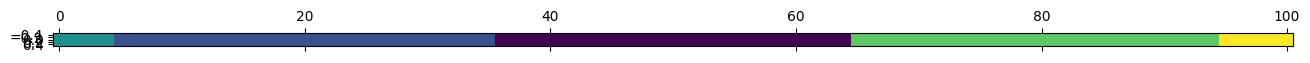

In [9]:
plt.matshow([lattice])